In [210]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import cycler

import scipy_extra.stats
import scipy_extra.optimize
import scipy_extra.fit

import importlib
importlib.reload(scipy_extra.stats)
importlib.reload(scipy_extra.fit)

import uncertainties

In [44]:
class Tango(object):

    scarlet_red_light = '#ef2929'
    scarlet_red = '#cc0000'
    scarlet_red_dark = '#a40000'

    aluminium_light = '#eeeeec'
    aluminium = '#d3d7cf'
    aluminium_dark = '#babdb6'

    butter_light = '#fce94f'
    butter = '#edd400'
    butter_dark = '#c4a000'

    chameleon_light = '#8ae234'
    chameleon = '#73d216'
    chameleon_dark = '#4e9a06'

    orange_light = '#fcaf3e'
    orange = '#f57900'
    orange_dark = '#ce5c00'

    chocolate_light = '#e9b96e'
    chocolate = '#c17d11'
    chocolate_dark = '#8f5902'

    sky_blue_light = '#729fcf'
    sky_blue = '#3465a4'
    sky_blue_dark = '#204a87'

    plum_light = '#ad7fa8'
    plum = '#75507b'
    plum_dark = '#5c3566'

    slate_light = '#888a85'
    slate = '#555753'
    slate_dark = '#2e3436'
    
    @staticmethod
    def get_color_palette(n_colors=9):
        colors = [Tango.sky_blue_dark, Tango.orange_dark, Tango.chocolate, Tango.slate_light, Tango.aluminium_dark, Tango.plum_dark, Tango.plum_light, Tango.chameleon_dark, Tango.chameleon_light]

        if n_colors > len(colors):
            print('Only {} different colors in list. All are returned.')
            return colors

        return colors[:n_colors]


def _init_style():
    matplotlib.rcParams['axes.axisbelow'] = True
    matplotlib.rcParams['axes.edgecolor'] = '.8'
    matplotlib.rcParams['axes.facecolor'] =  'white'
    matplotlib.rcParams['axes.grid'] =  True
    matplotlib.rcParams['axes.labelcolor'] =  '.15'
    matplotlib.rcParams['axes.linewidth'] = 1
    matplotlib.rcParams['figure.facecolor'] = 'white'
    matplotlib.rcParams['font.family'] =  ['sans-serif']
    matplotlib.rcParams['font.sans-serif'] =  ['Arial', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
    matplotlib.rcParams['grid.color'] = '.8'
    matplotlib.rcParams['grid.linestyle'] = '-'
    matplotlib.rcParams['image.cmap'] = 'Greys'
    matplotlib.rcParams['legend.frameon'] = True
    matplotlib.rcParams['legend.shadow'] = True
    matplotlib.rcParams['legend.fancybox'] = True
    matplotlib.rcParams['legend.numpoints'] = 1
    matplotlib.rcParams['legend.scatterpoints'] = 1
    matplotlib.rcParams['lines.solid_capstyle'] = 'round'
    matplotlib.rcParams['text.color'] =  '.15'
    matplotlib.rcParams['xtick.color'] = '.15'
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['xtick.major.size'] = 0
    matplotlib.rcParams['xtick.minor.size'] = 0
    matplotlib.rcParams['ytick.color'] = '.15'
    matplotlib.rcParams['ytick.direction'] = 'out'
    matplotlib.rcParams['ytick.major.size'] = 0
    matplotlib.rcParams['ytick.minor.size'] = 0
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.titlesize'] = 32
    matplotlib.rcParams['figure.figsize'] = (9.0, 7.0)
    matplotlib.rcParams['font.size'] = 30
    matplotlib.rcParams['grid.linewidth'] = 1.6
    matplotlib.rcParams['legend.fontsize'] = 32
    matplotlib.rcParams['lines.linewidth'] = 2.8
    matplotlib.rcParams['lines.markeredgewidth'] = 0.0
    matplotlib.rcParams['lines.markersize'] = 11.2
    matplotlib.rcParams['patch.linewidth'] = 0.48
    matplotlib.rcParams['xtick.labelsize'] = 28
    matplotlib.rcParams['xtick.major.pad'] = 11.2
    matplotlib.rcParams['xtick.major.width'] = 1.6
    matplotlib.rcParams['xtick.minor.width'] = 0.8
    matplotlib.rcParams['ytick.labelsize'] = 28
    matplotlib.rcParams['ytick.major.pad'] = 11.2
    matplotlib.rcParams['ytick.major.width'] = 1.6
    matplotlib.rcParams['ytick.minor.width'] = 0.8
    matplotlib.rcParams['axes.prop_cycle'] = cycler.cycler("color", Tango.get_color_palette())
    plt.rc('text', usetex=True)

_init_style()

class Component(object):
    evtgen_charged = r'$\Upsilon(4\mathrm{S}) \rightarrow B^+ B^-$'
    evtgen_mixed = r'$\Upsilon(4\mathrm{S}) \rightarrow B^0 \bar{B}^0$'
    evtgen_charm = r'$e^+ e^- \rightarrow c \bar{c}$'
    evtgen_uds = r'$e^+ e^- \rightarrow q \bar{q}\ (u d s)$'
    special_mixedrare = r'$B^0 \rightarrow rare$'
    special_chargedrare = r'$B^+ \rightarrow rare$'
    special_mixedulnu = r'$B^0 \rightarrow u l \nu$'
    special_chargedulnu = r'$B^+ \rightarrow u l \nu$'
    data_continuum = r'off-resonance data'
    data_Y4S = r'on-resonance data'
    signal = r'$B^+ \rightarrow \tau^+ \nu$'
    b2taunu = r'$B^+ \rightarrow \tau^+ \nu$'

    @classmethod
    def get(cls, component):
        component = component.replace('-', '_')
        if hasattr(cls, component):
            return getattr(cls, component)
        return component.replace('_', '-')
    
    @classmethod
    def get_color(cls, component):
        
        color = {
            'signal': Tango.sky_blue_dark,
            'evtgen-charged': Tango.orange_dark,
            'evtgen-mixed': Tango.chocolate,
            'evtgen-charm': Tango.slate_light,
            'evtgen-uds': Tango.aluminium_dark,
            'special-mixedrare': Tango.chameleon_dark,
            'special-mixedulnu': Tango.chameleon_light,
            'special-chargedrare': Tango.plum_dark,
            'special-chargedulnu': Tango.plum_light,
            'data-Y4S': 'black',
            'data-continuum': 'black',
            'background': Tango.orange_dark,
            'continuum': Tango.slate_light,
        }
        
        return color.get(component, 'black')
        component = component.replace('-', '_')
        if hasattr(cls, component):
            return getattr(cls, component)
        return component.replace('_', '-')


event_types = ['signal',
           'evtgen-charged',
           'evtgen-mixed',
           'evtgen-charm',
           'evtgen-uds',
           'special-mixedulnu',
           'special-mixedrare',
           'special-chargedulnu',
           'special-chargedrare',
           'data-Y4S',
           'data-continuum',
          ]

extraEnergy = 'ROE_eextra__boMichaelROE__bc'
weight = 'weight'

binning = dict(range=(0.0, 1.2), bins=24)
space = np.linspace(*binning['range'], 1000)

In [3]:
df = pd.read_pickle('/storage/jbod/tkeck/B2TauNuWorkspace_1/full_stream/belle1_final_stream_1_selected.pickle')
special_mask = df.index.get_level_values('event_types').isin(['special-chargedrare']) & df.is_signal_event

In [ ]:
def create_template(component):
    return scipy.stats.rv_histogram(np.histogram(component[extraEnergy].values, **binning))

def create_smoothed_kde_template(component):
    kde = scipy.stats.gaussian_kde(np.r_[component[extraEnergy].values, -component[extraEnergy].values, -component[extraEnergy].values + 2.4], 0.05)
    return scipy.stats.rv_histogram((kde.pdf(space[:-1]), space))

def create_smoothed_bsp_template(component):
    space = np.linspace(*binning['range'], binning['bins'])
    y, x, = np.histogram(component[extraEnergy].values, **binning)
    weights = np.ones(binning['bins'])
    weights[0] = 8.0
    weights[1] = 4.0
    weights[2] = 2.0
    knots = [0.05, 0.1, 0.2, 0.5, 0.8]
    spline = scipy.interpolate.LSQUnivariateSpline(x[:-1], y, knots, w=weights)
    return scipy.stats.rv_histogram((np.maximum(spline(space[:-1]), 0.0), space))

def create_smoothed_fit_template(component):
    
    distribution = scipy_extra.stats.rv_mixture([
        ('exponential', scipy.stats.expon),
        ('polynom', scipy_extra.stats.chebyshev_2),
    ])
    
    def mapping(free_parameters, include_normalisation=True):
        # Restrict all norms to positive values
        free_parameters[0] = max(free_parameters[0], 0.0)
        free_parameters[1] = max(free_parameters[1], 0.0)
        parameters = {
            'exponential_loc': 0.0,
            'exponential_scale': 0.15,
            'exponential_norm': free_parameters[0],
            'polynom_loc': 0.6,
            'polynom_scale': 0.6,
            'polynom_norm': free_parameters[1],
            'polynom_a_0': free_parameters[2],
            'polynom_a_1': free_parameters[3],
            'polynom_a_2': free_parameters[4],

        }
        if include_normalisation:
            parameters['__normalisation__'] = free_parameters[0] + free_parameters[1]
        return [parameters]
    
    fitter = Fitter(mapping, [distribution])
    r = fitter.fit([0.5, 0.5, 1.0, 1.0, 1.0], [component[extraEnergy].values])
    d = distribution(**mapping(r.x, include_normalisation=False)[0])
    
    return scipy.stats.rv_histogram((np.maximum(d.pdf(space[:-1]), 0.0), space))

In [201]:
final_templates = {}

for dM in [1,2,3,4,5,11,12,13,14,15]:
    x = df[~special_mask].loc[dM, [extraEnergy, weight]]
    final_templates[dM] = {
        'raw': {et: create_template(x.loc[et]) for et in event_types},
        'kde': {et: create_smoothed_kde_template(x.loc[et]) for et in event_types},
        'bsp': {et: create_smoothed_bsp_template(x.loc[et]) for et in event_types},
        'fit': {et: create_smoothed_fit_template(x.loc[et]) for et in event_types}
    }

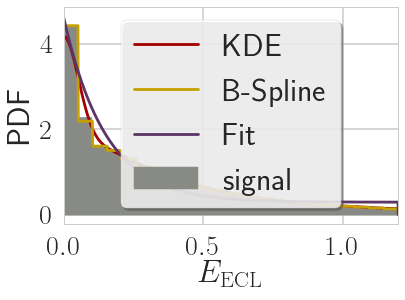

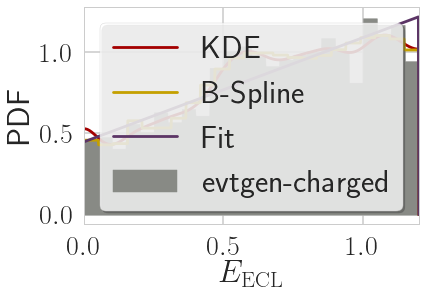

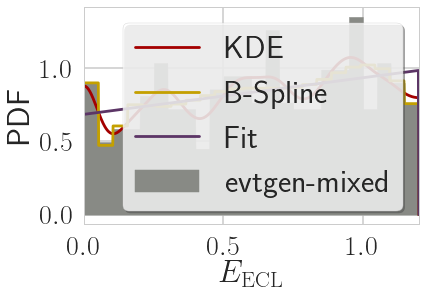

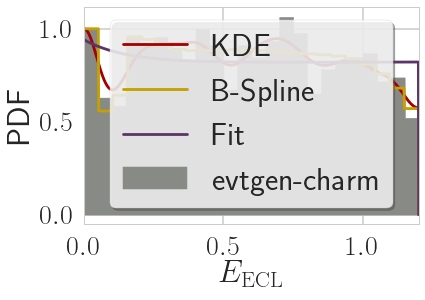

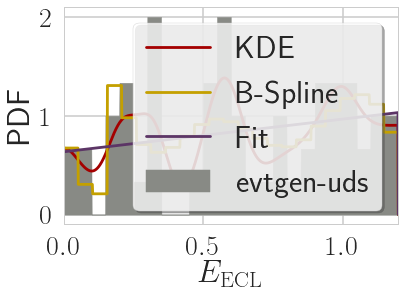

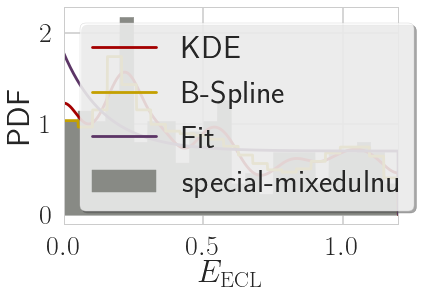

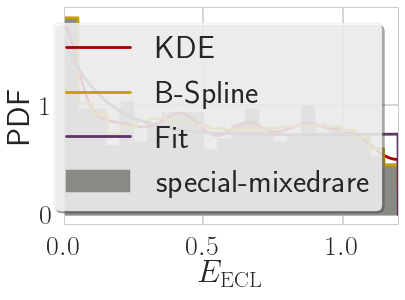

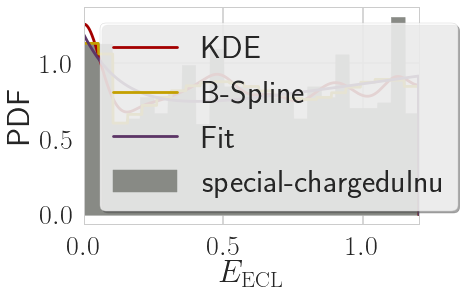

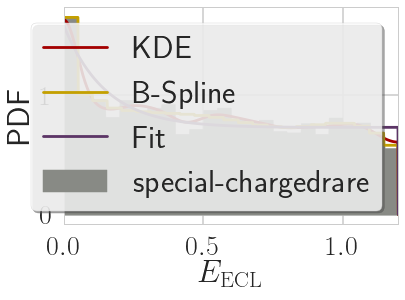

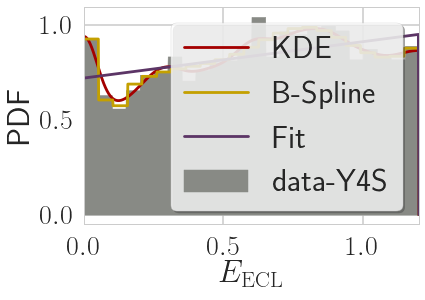

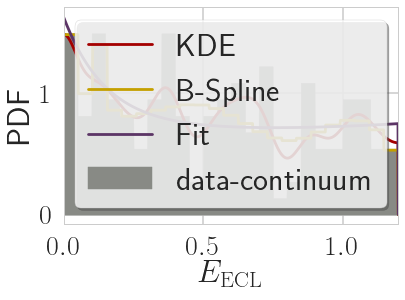

In [197]:
templates = final_templates[1]
for label, template in templates.items():
    plt.fill_between(space, templates['raw'][label].pdf(space), color=Tango.slate_light, label=label)
    plt.plot(space, templates['kde'][label].pdf(space), color=Tango.scarlet_red_dark, label='KDE')
    plt.plot(space, templates['bsp'][label].pdf(space), color=Tango.butter_dark, label='B-Spline')
    plt.plot(space, templates['fit'][label].pdf(space), color=Tango.plum_dark, label='Fit')
    plt.xlim(binning['range'])
    plt.legend()
    plt.xlabel(r'$E_{\mathrm{ECL}}$')
    plt.ylabel(r'PDF')
    plt.show()

In [245]:
class Fitter(object):
    def __init__(self, mapping, distributions, method='nelder-mead'):
        self.mapping = mapping
        self.distributions = distributions
        self.method = method

    def _maximum_likelihood_loss(self, free_parameters, data, weights):
        loss = 0.0 
        parameters = self.mapping(free_parameters)
        for d, w, p, distribution in zip(data, weights, parameters, self.distributions):
            if '__normalisation__' in p:
                N = np.sum(w)
                average_number_of_events = p['__normalisation__'] * N 
                loss += - N * np.log(average_number_of_events) + average_number_of_events
                del p['__normalisation__']
            loss += -np.sum(w * np.log(distribution.pdf(d, **p)))
        return loss

    def _get_weights(self, weights, data):
        if weights is None:
            weights = [np.ones(len(d)) for d in data]
        return weights

    def fit(self, initial_parameters, data, weights=None):
        r = scipy.optimize.minimize(self._maximum_likelihood_loss, initial_parameters, args=(data, self._get_weights(weights, data)), method=self.method)
        return r

In [265]:
def sanitize(s):
    return s.replace('-', '')

def individual_fit(data, templates):
    background_components = ['evtgen-charged', 'evtgen-mixed',
                             'special-chargedulnu', 'special-chargedrare',
                             'special-mixedulnu', 'special-mixedrare']
    continuum_components = ['evtgen-charm', 'evtgen-uds']
    
    extra_energy_distribution = scipy_extra.stats.rv_mixture([
        ('signal', templates['signal']),
        ('background', scipy_extra.stats.rv_mixture([(sanitize(c), templates[c]) for c in background_components])),
        ('continuum', scipy_extra.stats.rv_mixture([(sanitize(c), templates[c]) for c in continuum_components]))
    ])
    
    def mapping(free_parameters, include_normalisation=True):
        # Restrict all norms to positive values
        free_parameters = np.maximum(free_parameters, 0.0)
        parameters = {
            'signal_loc': 0.0,
            'signal_scale': 1.0,
            'signal_norm': free_parameters[0],
            'background_loc': 0.0,
            'background_scale': 1.0,
            'background_norm': free_parameters[1],
            'continuum_loc': 0.0,
            'continuum_scale': 1.0,
            'continuum_norm': free_parameters[2],
        }
        
        if include_normalisation:
            parameters['__normalisation__'] = np.sum(free_parameters)

        for c in background_components:
            parameters['background_' + sanitize(c) + '_loc'] = 0.0
            parameters['background_' + sanitize(c) + '_scale'] = 1.0
            parameters['background_' + sanitize(c) + '_norm'] = (
                x[x.index.get_level_values('event_types').isin([c])].weight.sum() /
                x[x.index.get_level_values('event_types').isin(background_components)].weight.sum()
            )

        for c in continuum_components:
            parameters['continuum_' + sanitize(c) + '_loc'] = 0.0
            parameters['continuum_' + sanitize(c) + '_scale'] = 1.0
            parameters['continuum_' + sanitize(c) + '_norm'] = (
                x[x.index.get_level_values('event_types').isin([c])].weight.sum() /
                x[x.index.get_level_values('event_types').isin(continuum_components)].weight.sum()
            )

        return [parameters]
    
    fitter = Fitter(mapping, [extra_energy_distribution])
    r = fitter.fit([0.1, 0.6, 0.3], [data[extraEnergy].values])

    return r, extra_energy_distribution(**mapping(r.x, include_normalisation=False)[0])


def plot_data_and_model(data, r, fitted_distribution):
    content, boundaries = np.histogram(data[extraEnergy].values, **binning)
    plt.errorbar((boundaries[1:] + boundaries[:-1])/2, content, yerr=np.sqrt(content), color='black', ls='', fmt='s', markersize=10, lw=3, label='on-resonance data')
    
    weight = len(data) / binning['bins'] * (binning['range'][1] - binning['range'][0])
    plt.fill_between(space, weight * np.sum(r.x) * fitted_distribution.pdf(space), label=fit_model.name, color=Tango.chocolate)
    for name, distribution, norm_name, shape_names in zip(fitted_distribution.dist._components,
                                                          fitted_distribution.dist._distributions,
                                                          fitted_distribution.dist._distribution_norms,
                                                          fitted_distribution.dist._distribution_shapes):
        norm = fitted_distribution.kwds[norm_name]
        shapes = {'_'.join(k.split('_')[1:]) : fitted_distribution.kwds[k] for k in shape_names}
        plt.plot(space, weight * norm * distribution.pdf(space, **shapes), label=name, color=Component.get_color(name))
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.xlim(0.0, 1.2)
    plt.show()

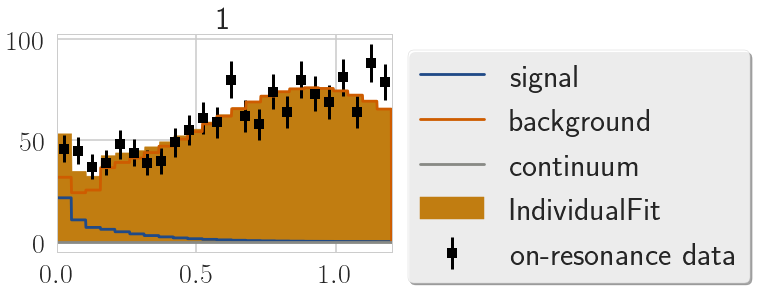

1 2.00826786926
0.000200826786926


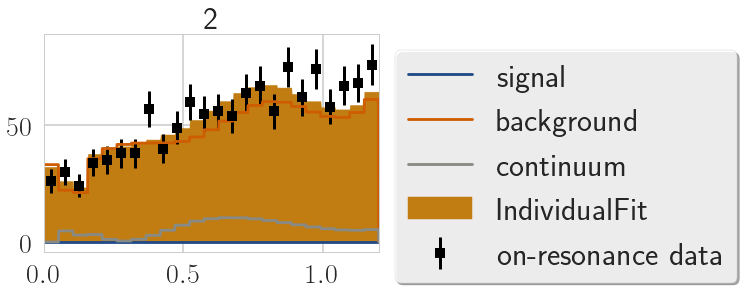

2 -1.74018681534
-0.000174018681534


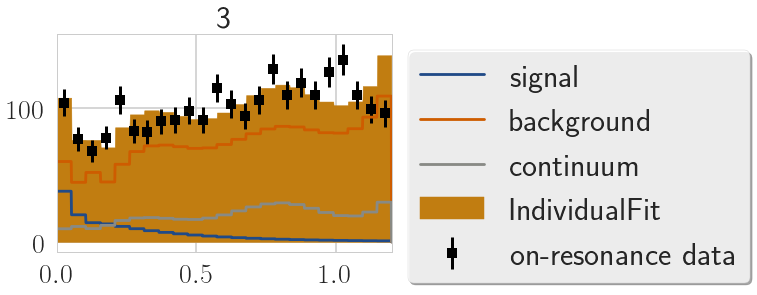

3 0.360260096811
3.60260096811e-05


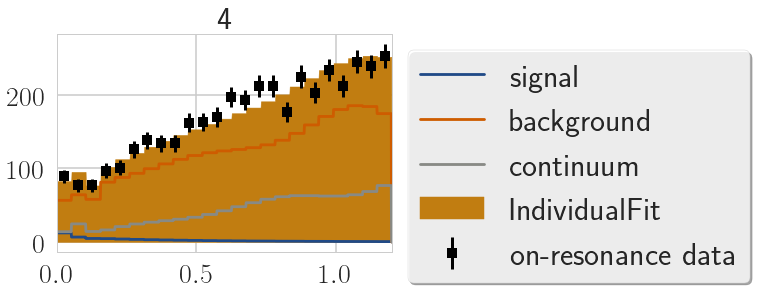

4 0.443651241498
4.43651241498e-05


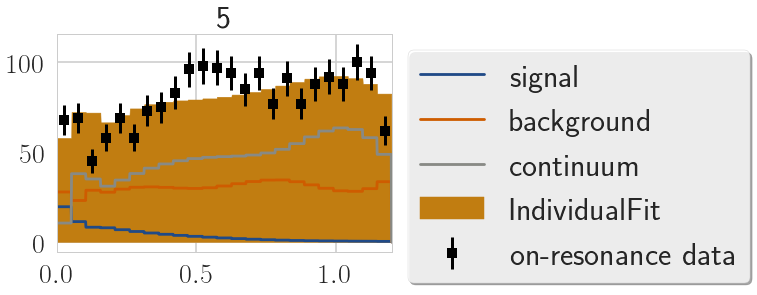

5 7.43821039277
0.000743821039277


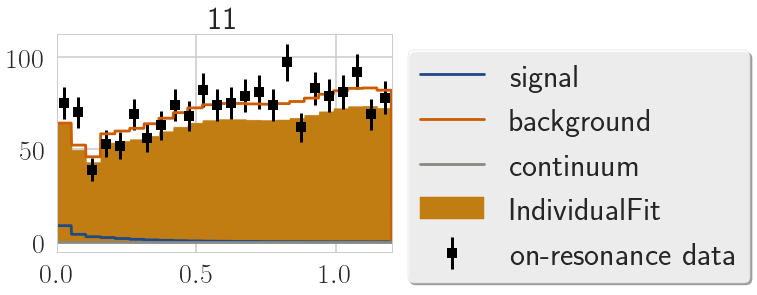

11 0.534465861104
5.34465861104e-05


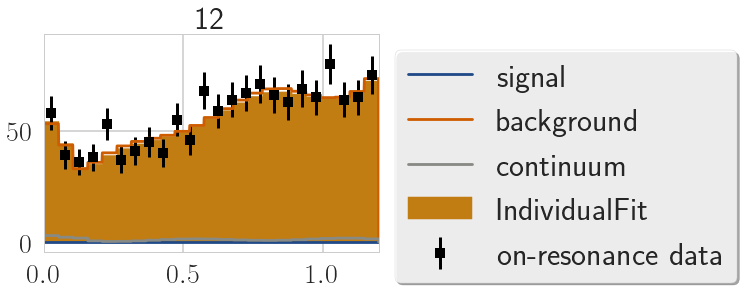

12 -1.60700792202
-0.000160700792202


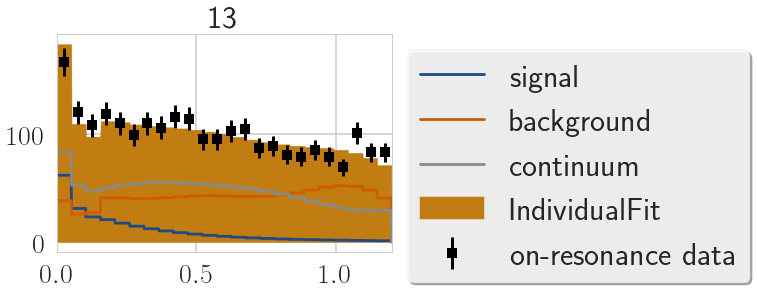

13 0.52962106138
5.2962106138e-05


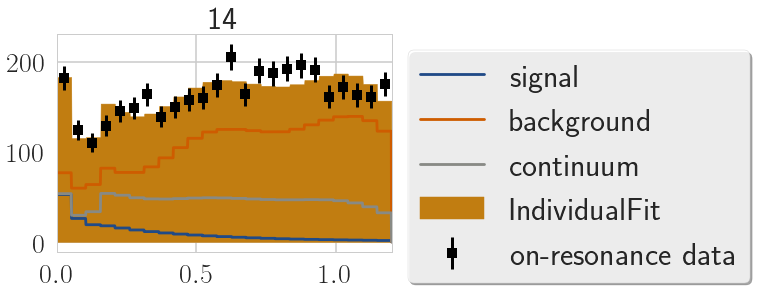

14 1.3363133359
0.00013363133359


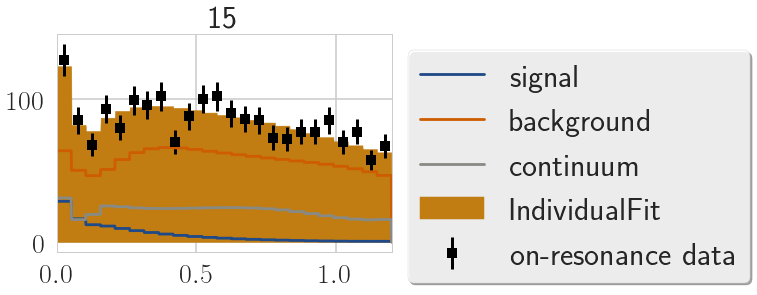

15 7.48566209455
0.000748566209455


In [268]:
branching_fractions = {}

efficiency = {
    1: 6.1e-4,
    2: 4.1e-4,
    3: 10.1e-4,
    4: 6.0e-4,
    5: 1.4e-4,
    11: 6.8e-4,
    12: 4.2e-4,
    13: 10.5e-4,
    14: 7.6e-4,
    15: 1.7e-4,
}

cross_feed = {
    1: 0.91,
    2: 0.93,
    3: 0.20,
    4: 0.68,
    5: 0.82,
    11: 0.86,
    12: 0.87,
    13: 0.20,
    14: 0.64,
    15: 0.77,
}

for dM in [1,2,3,4,5,11,12,13,14,15]:
    data = df.loc[dM].loc['data-Y4S']
    r, fitted_distribution = individual_fit(data, final_templates[dM]['bsp'])
    plt.title(str(dM))
    plot_data_and_model(data, r, fitted_distribution)

    scale = len(x.loc['data-Y4S']) / (772e6 * efficiency[dM]) * cross_feed[dM]
    print(dM, r.x[0] * scale * 1e4)
    branching_fractions[dM] = r.x[0] * scale
    print(branching_fractions[dM])
    #uncertainty = fitter.get_likelihood_uncertainty({'signal_norm': [0.0, 1.0]}, [result['signal_norm']], r.fun, fit_model, data)
    #branching_fractions[dM] = uncertainties.ufloat(result['signal_norm'],
    #                                               max(abs(uncertainty[0][0]-result['signal_norm']),
    #                                                   abs(uncertainty[0][1]-result['signal_norm']))) * scale

In [279]:
def global_fit(data, templates, decayModeIDs, smoother='bsp'):
    background_components = ['evtgen-charged', 'evtgen-mixed',
                             'special-chargedulnu', 'special-chargedrare',
                             'special-mixedulnu', 'special-mixedrare']
    continuum_components = ['evtgen-charm', 'evtgen-uds']
    
    extra_energy_distributions = [ scipy_extra.stats.rv_mixture([
        ('signal', templates[dM][smoother]['signal']),
        ('background', scipy_extra.stats.rv_mixture([(sanitize(c), templates[dM][smoother][c]) for c in background_components])),
        ('continuum', scipy_extra.stats.rv_mixture([(sanitize(c), templates[dM][smoother][c]) for c in continuum_components]))
    ]) for dM in decayModeIDs]
    
    def mapping(free_parameters, include_normalisation=True):
        # Restrict all norms to positive values
        free_parameters = np.maximum(free_parameters, 0.0)
        
        all_parameters = []
        for i, dM in enumerate(decayModeIDs):
            parameters = {
                'signal_loc': 0.0,
                'signal_scale': 1.0,
                'signal_norm': free_parameters[0] / (772e6 * efficiency[dM]),
                'background_loc': 0.0,
                'background_scale': 1.0,
                'background_norm': free_parameters[2*i+1],
                'continuum_loc': 0.0,
                'continuum_scale': 1.0,
                'continuum_norm': free_parameters[2*i+2],
            }

            if include_normalisation:
                parameters['__normalisation__'] = np.sum(free_parameters)

            for c in background_components:
                parameters['background_' + sanitize(c) + '_loc'] = 0.0
                parameters['background_' + sanitize(c) + '_scale'] = 1.0
                parameters['background_' + sanitize(c) + '_norm'] = (
                    data[data.index.get_level_values('event_types').isin([c])].loc[dM].weight.sum() /
                    data[data.index.get_level_values('event_types').isin(background_components)].loc[dM].weight.sum()
                )

            for c in continuum_components:
                parameters['continuum_' + sanitize(c) + '_loc'] = 0.0
                parameters['continuum_' + sanitize(c) + '_scale'] = 1.0
                parameters['continuum_' + sanitize(c) + '_norm'] = (
                    data[data.index.get_level_values('event_types').isin([c])].loc[dM].weight.sum() /
                    data[data.index.get_level_values('event_types').isin(continuum_components)].loc[dM].weight.sum()
                )
            all_parameters += [parameters]

        return all_parameters
    
    fitter = Fitter(mapping, extra_energy_distributions)
    r = fitter.fit([1e-4] + [0.6, 0.3]*5, [data.loc[dM].loc['data-Y4S'][extraEnergy].values for dM in decayModeIDs])

    return r, extra_energy_distributions, mapping # (**mapping(r.x, include_normalisation=False)[0])

In [280]:
r, distributions, mapping = global_fit(df, final_templates, [1,2,3,4,5])
r

 final_simplex: (array([[  2.09562852e-04,   5.85527407e-03,   7.97231001e-01,
          4.41582907e-03,   3.65131097e-01,   3.75635469e-01,
          5.73796909e-01,  -4.99602069e-07,   2.06130971e-01,
          2.71686217e-02,   2.16073639e-03],
       [  2.09563821e-04,   5.85605560e-03,   7.97231285e-01,
          4.40971734e-03,   3.65135117e-01,   3.75640817e-01,
          5.73794338e-01,  -3.05436801e-06,   2.06130070e-01,
          2.71622839e-02,   2.16105485e-03],
       [  2.09563973e-04,   5.85682342e-03,   7.97231769e-01,
          4.40827257e-03,   3.65136492e-01,   3.75646461e-01,
          5.73791533e-01,  -5.53673663e-06,   2.06130460e-01,
          2.71568201e-02,   2.16134922e-03],
       [  2.09564793e-04,   5.85639073e-03,   7.97231361e-01,
          4.40387574e-03,   3.65138721e-01,   3.75643355e-01,
          5.73793186e-01,  -4.41068479e-06,   2.06128857e-01,
          2.71585082e-02,   2.16115445e-03],
       [  2.09565114e-04,   5.85805932e-03,   7.97232455e-0

In [ ]:
from IPython.core import debugger
debug = debugger.Pdb()
#debug.runcall(dist.pdf, space)